In [2]:
#In this code Multilingual dataset is used along with text preprocessing, tokenization, tfidf vectorization. 5-6 models are already added

In [6]:
# Array
import numpy as np

# Dataframe
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

#Data Reading
data= pd.read_csv(r'C:\Users\DELL\Desktop\StressDetection\sentiment_analysis_term_train.csv')

# Copy
stress=data.copy()

# Data
stress.head()

,text,label
0,हमें इससे बेहतर ब्राइटनेस वाले टेबलेट देखने को...,neg
1,बैटरी लाइफ बहुत बढिया है।,pos
2,हकीकत ये है कि मेटल के नाम पर फोन में सिर्फ चा...,neu
3,स्लोफो एक मनोरंजक एप्लिकेशन है इसमें कोई दो रा...,pos
4,अच्छी बैटरी क्षमता है।,pos


In [7]:
# Info
stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2497 non-null   object
 1   label   2497 non-null   object
dtypes: object(2)
memory usage: 39.1+ KB


In [8]:
# Checking null values
stress.isnull().sum()

text     0
label    0
dtype: int64

In [9]:
# Statistical Information
stress.describe()

,text,label
count,2497,2497
unique,2497,3
top,हमें इससे बेहतर ब्राइटनेस वाले टेबलेट देखने को...,pos
freq,1,1147


In [10]:
import pandas as pd
from transformers import MarianMTModel, MarianTokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [11]:
model_name = "Helsinki-NLP/opus-mt-mul-en"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

In [12]:
# Translate text from any supported language to English
def translate(text, source_lang="auto"):
    try:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, source_lang=source_lang)
        outputs = model.generate(**inputs)
        translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
        return translated_text
    except Exception as e:
        print(f"Translation error: {e}")
        return None

In [13]:
# Delete rows with 'neu' label
data = data[data['label'] != 'neu']

# Convert 'pos' to 1 and 'neg' to 0
data['label'] = data['label'].map({'pos': 1, 'neg': 0})

# Print the resulting DataFrame
data.head()

,text,label
0,हमें इससे बेहतर ब्राइटनेस वाले टेबलेट देखने को...,0
1,बैटरी लाइफ बहुत बढिया है।,1
3,स्लोफो एक मनोरंजक एप्लिकेशन है इसमें कोई दो रा...,1
4,अच्छी बैटरी क्षमता है।,1
5,बैटरी लाइफ की बात करें तो हमारे लगातार वीडियो ...,1


In [14]:
from googletrans import Translator

# Initialize translator
translator = Translator()

# Function to translate text
def translate_text(text, source_lang):
    try:
        translation = translator.translate(text, src=source_lang, dest='en')
        return translation.text
    except Exception as e:
        print(f"Translation error: {e}")
        return None

# Apply translation using Google Translate
data['text'] = data.apply(lambda row: translate_text(row['text'], source_lang="hi"), axis=1)

# Remove rows with translation errors
data = data.dropna(subset=['text'])


In [15]:
# Array
import numpy as np

# Dataframe
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

#Data Reading
stress_c= pd.read_csv(r'C:\Users\DELL\Desktop\StressDetection\Stress.csv')

# Copy
stress=stress_c.copy()

# Data
stress.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [16]:
# Select only 'text' and 'label' columns
stress = stress[['text', 'label']]

# Print the resulting DataFrame
stress.head()

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1


In [17]:
# Concatenate the rows of 'stree' onto 'data'
merged_data = pd.concat([data, stress], ignore_index=True)

# Print the concatenated DataFrame
print(merged_data)

                                                   text  label
0     We have got to see tablets with better brightn...      0
1                            Battery life is very good.      1
2     Slopho is an entertaining application, there i...      1
3                                Good battery capacity.      1
4     Talking about the battery life, our consistent...      1
...                                                 ...    ...
4331  * Her, a week ago: Precious, how are you? (I i...      0
4332  I don't have the ability to cope with it anymo...      1
4333  In case this is the first time you're reading ...      0
4334  Do you find this normal? They have a good rela...      0
4335  I was talking to my mom this morning and she s...      1

[4336 rows x 2 columns]


In [18]:
# Calculate the percentage of each label
label_counts = merged_data['label'].value_counts(normalize=True) * 100

# Print the percentage of each label
print("Percentage of label 0:", label_counts[0])
print("Percentage of label 1:", label_counts[1])

Percentage of label 0: 39.22970479704797
Percentage of label 1: 60.77029520295203


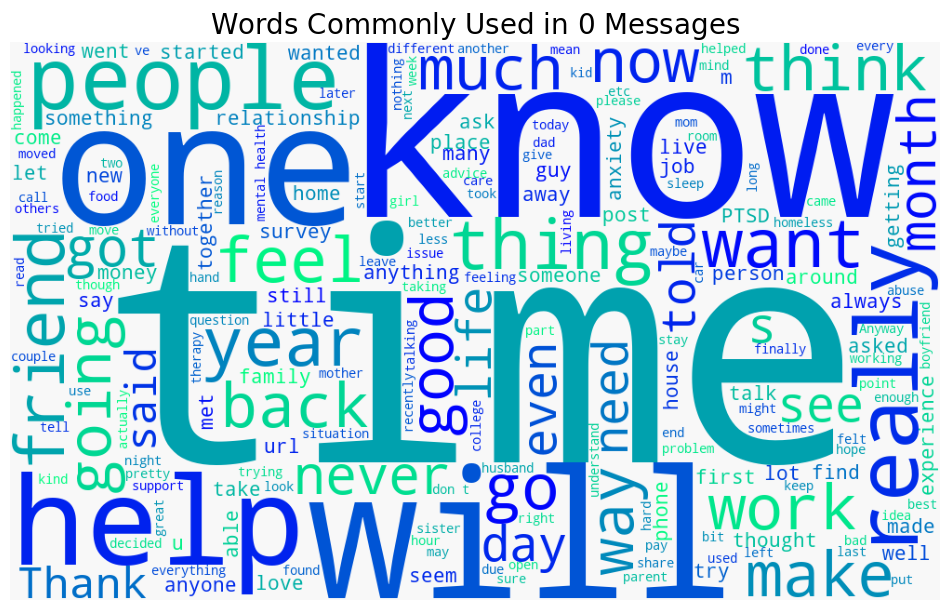

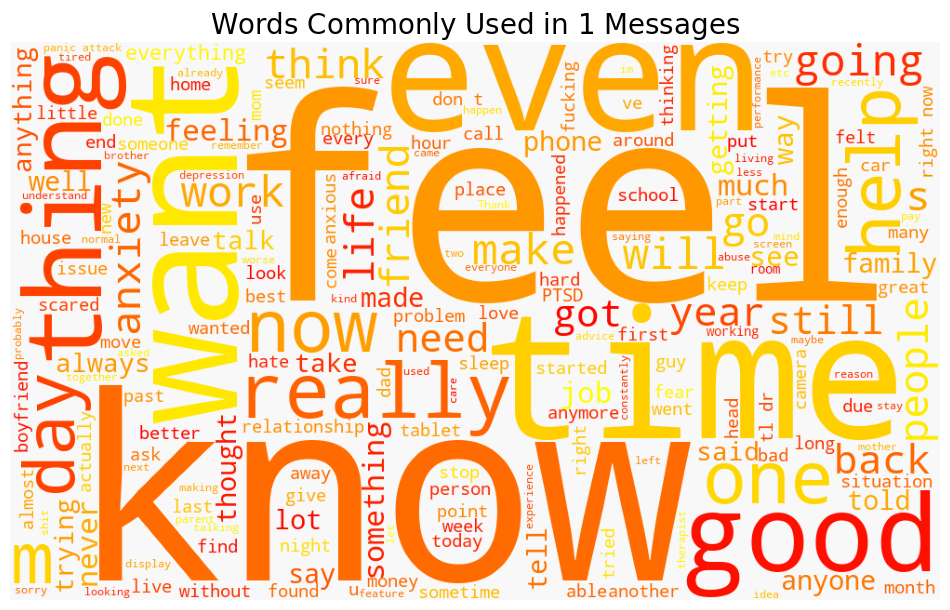

In [19]:
for label, cmap in zip([0,1],
                       ['winter', 'autumn', 'magma', 'viridis', 'plasma']):
    text = merged_data.query('label == @label')['text'].str.cat(sep=' ')
    plt.figure(figsize=(12, 9))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Messages", size=20)
    plt.show()

In [20]:
# Regular Expression
import re 

# Handling string
import string

# NLP tool
import spacy

nlp=spacy.load('en_core_web_sm')
from spacy.lang.en.stop_words import STOP_WORDS

# Importing Natural Language Tool Kit for NLP operations
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')                                
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [21]:
#defining function for preprocessing
def preprocess(text,remove_digits=True):
    text = re.sub('\W+',' ', text)                                       
    text = re.sub('\s+',' ', text)                                       
    text = re.sub("(?<!\w)\d+", "", text)                                
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)                          
    text=text.lower()
    nopunc=[char for char in text if char not in string.punctuation]    
    nopunc=''.join(nopunc)
    nopunc=' '.join([word for word in nopunc.split()
               if word.lower() not in stopwords.words('english')])  
    
    
    return nopunc
# Defining a function for lemitization
def lemmatize(words):
   
    words=nlp(words)
    lemmas = []
    for word in words:
        
        lemmas.append(word.lemma_)
    return lemmas



#converting them into string
def listtostring(s):
    str1=' '
    return (str1.join(s))

def clean_text(input):
    word=preprocess(input)
    lemmas=lemmatize(word)
    return listtostring(lemmas)

In [22]:
# Creating a feature to store clean texts
merged_data['clean_text']=merged_data['text'].apply(clean_text)
merged_data.head()

,text,label,clean_text
0,We have got to see tablets with better brightn...,0,get see tablet well brightness
1,Battery life is very good.,1,battery life good
2,"Slopho is an entertaining application, there i...",1,slopho entertain application two opinion still...
3,Good battery capacity.,1,good battery capacity
4,"Talking about the battery life, our consistent...",1,talk battery life consistent video playback te...


In [23]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from transformers import BertTokenizer, BertForSequenceClassification
import torch


# Model Building
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold,train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score
from sklearn.pipeline import Pipeline

# Time
from time import time

In [24]:
# Defining target & feature for ML model building
x=merged_data['clean_text']
y=merged_data['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [25]:
# Self-defining function to convert the data into vector form by tf idf 
#vectorizer and classify and create model by Logistic regression

def model_lr_tf(x_train, x_test, y_train, y_test):
    global acc_lr_tf,f1_lr_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
 
    ovr = LogisticRegression()
    
    #fitting training data into the model & predicting
    
    t0 = time()

    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_lr_tf=accuracy_score(y_test,y_pred)
    f1_lr_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time :',time()-t0)
    print('Accuracy: ',acc_lr_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_lr_tf

In [26]:

def model_lr_bow(x_train, x_test, y_train, y_test):
    global acc_lr_bow, f1_lr_bow
    # Text to vector transformation using Bag of Words
    vector = CountVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
 
    ovr = LogisticRegression()
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train, y_train)
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_lr_bow = accuracy_score(y_test, y_pred)
    f1_lr_bow = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_lr_bow)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_lr_bow


In [27]:

def model_lr_ng(x_train, x_test, y_train, y_test):
    global acc_lr_ng, f1_lr_ng
    # Text to vector transformation using Bag of Words
    vector = CountVectorizer(analyzer = 'word',ngram_range=(1,3), stop_words='english')
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
 
    ovr = LogisticRegression()
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train, y_train)
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_lr_ng = accuracy_score(y_test, y_pred)
    f1_lr_ng = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_lr_ng)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_lr_ng


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from time import time

def model_lr_one_hot(x_train, x_test, y_train, y_test):
    global acc_lr_one_hot, f1_lr_one_hot
    
    # Convert categorical variables to one-hot encoded features
    encoder = OneHotEncoder(handle_unknown='ignore')
    x_train_reshaped = x_train.values.reshape(-1, 1)
    x_test_reshaped = x_test.values.reshape(-1, 1)
    x_train_encoded = encoder.fit_transform(x_train_reshaped)
    x_test_encoded = encoder.transform(x_test_reshaped)
 
    ovr = LogisticRegression()
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train_encoded, y_train)
    y_pred = ovr.predict(x_test_encoded)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_lr_one_hot = accuracy_score(y_test, y_pred)
    f1_lr_one_hot = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_lr_one_hot)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_lr_one_hot

# Example usage:
# y_test, y_pred, acc_lr_one_hot = model_lr_one_hot(x_train, x_test, y_train, y_test)


In [26]:
# from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
# import torch
# from sklearn.metrics import accuracy_score, f1_score

# # Self-defining function to convert the data into vector form by BERT embedding
# # and classify and create model by Logistic regression
# def model_lr_bert(x_train, x_test, y_train, y_test):
#     global acc_lr_bert, f1_lr_bert

#     # Load pre-trained BERT model and tokenizer
#     model_name = 'bert-base-uncased'
#     tokenizer = BertTokenizer.from_pretrained(model_name)
#     model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

#     # Function to encode text using BERT embedding
#     def bert_encode(text):
#         try:
#             tokens = tokenizer.tokenize(text)
#             tokens = ['[CLS]'] + tokens + ['[SEP]']
#             input_ids = torch.tensor([tokenizer.convert_tokens_to_ids(tokens)]).long()
        
#             with torch.no_grad():
#                 output = model(input_ids)
#             last_hidden_states = output[0]
        
#             if last_hidden_states.dim() < 2:
#                 raise ValueError("Unexpected dimensions in last_hidden_states")
        
#             return last_hidden_states[:, 0, :].mean(dim=0).detach().numpy()
    
#         except Exception as e:
#             print("Error occurred during BERT encoding:", e)
#             return None



#     # Convert text data to BERT embeddings
#     x_train_bert = [bert_encode(text) for text in x_train]
#     x_test_bert = [bert_encode(text) for text in x_test]

#     # Reshape data for Logistic Regression
#     x_train_bert = np.array(x_train_bert).reshape(-1, 768)
#     x_test_bert = np.array(x_test_bert).reshape(-1, 768)

#     # Define training arguments
#     training_args = TrainingArguments(
#         output_dir='./results',
#         num_train_epochs=5,
#         per_device_train_batch_size=16,
#         per_device_eval_batch_size=64,
#         warmup_steps=500,
#         weight_decay=0.01,
#         logging_dir='./logs',
#         logging_steps=10,
#         load_best_model_at_end=True,
#         metric_for_best_model='accuracy',
#         evaluation_strategy='epoch'
#     )

#     # Define trainer
#     trainer = Trainer(
#         model=model,
#         args=training_args,
#         train_dataset=torch.utils.data.TensorDataset(torch.tensor(x_train_bert), torch.tensor(y_train)),
#         eval_dataset=torch.utils.data.TensorDataset(torch.tensor(x_test_bert), torch.tensor(y_test))
#     )

#     # Train the model
#     trainer.train()

#     # Evaluate the model
#     predictions = trainer.predict(torch.tensor(x_test_bert))
#     y_pred = np.argmax(predictions.predictions, axis=1)


#     # Model Evaluation
#     acc_lr_bert = accuracy_score(y_test, y_pred)
#     f1_lr_bert = f1_score(y_test, y_pred, average='weighted')
#     print('Accuracy: ', acc_lr_bert)
#     print(10 * '===========')
#     print('Classification Report: \n', classification_report(y_test, y_pred))

#     return y_test, y_pred, acc_lr_bert


import torch
import numpy as np
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import accuracy_score

# Load the pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'  # You can choose other variants as well
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)  # Assuming binary classification

# Tokenize input texts and convert them into input IDs
max_length = 128  # You can adjust this value based on your input text lengths
x_train_tokens = tokenizer.batch_encode_plus(
    x_train.tolist(),
    max_length=max_length,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)
x_test_tokens = tokenizer.batch_encode_plus(
    x_test.tolist(),
    max_length=max_length,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

# Create Tensor datasets
train_dataset = TensorDataset(x_train_tokens['input_ids'], x_train_tokens['attention_mask'], torch.tensor(y_train.values))
test_dataset = TensorDataset(x_test_tokens['input_ids'], x_test_tokens['attention_mask'], torch.tensor(y_test.values))

# Define batch size and create DataLoaders
batch_size = 16  # You can adjust this based on your memory capacity
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, sampler=RandomSampler(train_dataset))
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, sampler=SequentialSampler(test_dataset))

# Define optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
epochs = 3  # Define the number of training epochs
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Training loop
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping to avoid exploding gradients
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_loss / len(train_dataloader)

    # Validation loop
    model.eval()
    all_preds = []
    for batch in test_dataloader:
        with torch.no_grad():
            input_ids, attention_mask, labels = batch
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            all_preds.extend(preds)

    accuracy = accuracy_score(y_test.values, all_preds)
    print(f"Epoch {epoch + 1}/{epochs}, Average Training Loss: {avg_train_loss}, Validation Accuracy: {accuracy}")

# Optionally, you can save the model
# torch.save(model.state_dict(), 'bert_model.pth')



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


: 

In [30]:
from sklearn.svm import SVC

def model_svm_tf(x_train, x_test, y_train, y_test):
    global acc_svm_tf, f1_svm_tf
    
    # Text to vector transformation using TF-IDF
    vectorizer = TfidfVectorizer()
    x_train = vectorizer.fit_transform(x_train)
    x_test = vectorizer.transform(x_test)
    
    # Initialize SVM classifier
    svm = SVC(random_state=1)
    
    # Fitting training data into the model & predicting
    t0 = time()
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_svm_tf = accuracy_score(y_test, y_pred)
    f1_svm_tf = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_svm_tf)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_svm_tf


In [31]:
def model_svm_bow(x_train, x_test, y_train, y_test):
    global acc_svm_bow, f1_svm_bow
    
    # Text to vector transformation using Bag of Words
    vectorizer = CountVectorizer()
    x_train = vectorizer.fit_transform(x_train)
    x_test = vectorizer.transform(x_test)
    
    # Initialize SVM classifier
    svm = SVC(random_state=1)
    
    # Fitting training data into the model & predicting
    t0 = time()
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_svm_bow = accuracy_score(y_test, y_pred)
    f1_svm_bow = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_svm_bow)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_svm_bow


In [32]:
def model_svm_one_hot(x_train, x_test, y_train, y_test):
    global acc_svm_one_hot, f1_svm_one_hot
    
    # Convert categorical variables to one-hot encoded features
    encoder = OneHotEncoder(handle_unknown='ignore')
    x_train_reshaped = x_train.values.reshape(-1, 1)
    x_test_reshaped = x_test.values.reshape(-1, 1)
    x_train_encoded = encoder.fit_transform(x_train_reshaped)
    x_test_encoded = encoder.transform(x_test_reshaped)
    
    # Initialize SVM classifier
    svm = SVC(random_state=1)
    
    # Fitting training data into the model & predicting
    t0 = time()
    svm.fit(x_train_encoded, y_train)
    y_pred = svm.predict(x_test_encoded)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_svm_one_hot = accuracy_score(y_test, y_pred)
    f1_svm_one_hot = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_svm_one_hot)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_svm_one_hot


In [33]:
# Self defining function to convert the data into vector form by tf idf 
#vectorizer and classify and create model by MultinomialNB

def model_nb_tf(x_train, x_test, y_train, y_test):
    global acc_nb_tf,f1_nb_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)

    ovr = MultinomialNB()
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_nb_tf=accuracy_score(y_test,y_pred)
    f1_nb_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_nb_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_nb_tf


In [34]:

def model_nb_bow(x_train, x_test, y_train, y_test):
    global acc_nb_bow, f1_nb_bow
    # Text to vector transformation using Bag of Words
    vector = CountVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
 
    ovr = MultinomialNB()
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train, y_train)
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_nb_bow = accuracy_score(y_test, y_pred)
    f1_nb_bow = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_nb_bow)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_nb_bow


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from time import time

def model_nb_one_hot(x_train, x_test, y_train, y_test):
    global acc_nb_one_hot, f1_nb_one_hot
    
    # Convert categorical variables to one-hot encoded features
    encoder = OneHotEncoder(handle_unknown='ignore')
    x_train_reshaped = x_train.values.reshape(-1, 1)
    x_test_reshaped = x_test.values.reshape(-1, 1)
    x_train_encoded = encoder.fit_transform(x_train_reshaped)
    x_test_encoded = encoder.transform(x_test_reshaped)
 
    ovr = MultinomialNB()
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train_encoded, y_train)
    y_pred = ovr.predict(x_test_encoded)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_nb_one_hot = accuracy_score(y_test, y_pred)
    f1_nb_one_hot = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_nb_one_hot)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_nb_one_hot

# Example usage:
# y_test, y_pred, acc_lr_one_hot = model_lr_one_hot(x_train, x_test, y_train, y_test)


In [36]:
# Self defining function to convert the data into vector form by tf idf
# vectorizer and classify and create model by Decision Tree
def model_dt_tf(x_train, x_test, y_train, y_test):
    global acc_dt_tf,f1_dt_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    

    ovr = DecisionTreeClassifier(random_state=1)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_dt_tf=accuracy_score(y_test,y_pred)
    f1_dt_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_dt_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_dt_tf

In [37]:

def model_dt_bow(x_train, x_test, y_train, y_test):
    global acc_dt_bow, f1_dt_bow
    # Text to vector transformation using Bag of Words
    vector = CountVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
 
    ovr = DecisionTreeClassifier(random_state=1)
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train, y_train)
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_dt_bow = accuracy_score(y_test, y_pred)
    f1_dt_bow = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_dt_bow)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_dt_bow


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from time import time

def model_dt_one_hot(x_train, x_test, y_train, y_test):
    global acc_dt_one_hot, f1_dt_one_hot
    
    # Convert categorical variables to one-hot encoded features
    encoder = OneHotEncoder(handle_unknown='ignore')
    x_train_reshaped = x_train.values.reshape(-1, 1)
    x_test_reshaped = x_test.values.reshape(-1, 1)
    x_train_encoded = encoder.fit_transform(x_train_reshaped)
    x_test_encoded = encoder.transform(x_test_reshaped)
 
    ovr = DecisionTreeClassifier(random_state=1)
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train_encoded, y_train)
    y_pred = ovr.predict(x_test_encoded)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_dt_one_hot = accuracy_score(y_test, y_pred)
    f1_dt_one_hot = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_dt_one_hot)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_dt_one_hot

# Example usage:
# y_test, y_pred, acc_lr_one_hot = model_lr_one_hot(x_train, x_test, y_train, y_test)


In [39]:
# Self defining function to convert the data into vector form by tf idf 
#vectorizer and classify and create model by KNN

def model_knn_tf(x_train, x_test, y_train, y_test):
    global acc_knn_tf,f1_knn_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    

    ovr = KNeighborsClassifier()
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_knn_tf=accuracy_score(y_test,y_pred)
    f1_knn_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_knn_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))


In [40]:

def model_knn_bow(x_train, x_test, y_train, y_test):
    global acc_knn_bow, f1_knn_bow
    # Text to vector transformation using Bag of Words
    vector = CountVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
 
    ovr = KNeighborsClassifier()
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train, y_train)
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_knn_bow = accuracy_score(y_test, y_pred)
    f1_knn_bow = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_knn_bow)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_knn_bow


In [41]:
# Self defining function to convert the data into vector form by tf idf 
#vectorizer and classify and create model by Random Forest

def model_rf_tf(x_train, x_test, y_train, y_test):
    global acc_rf_tf,f1_rf_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)

    ovr = RandomForestClassifier(random_state=1)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_rf_tf=accuracy_score(y_test,y_pred)
    f1_rf_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_rf_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))


In [42]:

def model_rf_bow(x_train, x_test, y_train, y_test):
    global acc_rf_bow, f1_rf_bow
    # Text to vector transformation using Bag of Words
    vector = CountVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
 
    ovr = RandomForestClassifier(random_state=1)
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train, y_train)
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_rf_bow = accuracy_score(y_test, y_pred)
    f1_rf_bow = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_rf_bow)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_rf_bow


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from time import time

def model_rf_one_hot(x_train, x_test, y_train, y_test):
    global acc_rf_one_hot, f1_rf_one_hot
    
    # Convert categorical variables to one-hot encoded features
    encoder = OneHotEncoder(handle_unknown='ignore')
    x_train_reshaped = x_train.values.reshape(-1, 1)
    x_test_reshaped = x_test.values.reshape(-1, 1)
    x_train_encoded = encoder.fit_transform(x_train_reshaped)
    x_test_encoded = encoder.transform(x_test_reshaped)
 
    ovr = RandomForestClassifier(random_state=1)
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train_encoded, y_train)
    y_pred = ovr.predict(x_test_encoded)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_rf_one_hot = accuracy_score(y_test, y_pred)
    f1_rf_one_hot = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_rf_one_hot)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_rf_one_hot

# Example usage:
# y_test, y_pred, acc_lr_one_hot = model_lr_one_hot(x_train, x_test, y_train, y_test)


In [44]:
# Self defining function to convert the data into vector form by tf idf
# vectorizer and classify and create model by Adaptive Boosting

def model_ab_tf(x_train, x_test, y_train, y_test):
    global acc_ab_tf,f1_ab_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    

    
    ovr = AdaBoostClassifier(random_state=1)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_ab_tf=accuracy_score(y_test,y_pred)
    f1_ab_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_ab_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))

In [45]:

def model_ab_bow(x_train, x_test, y_train, y_test):
    global acc_ab_bow, f1_ab_bow
    # Text to vector transformation using Bag of Words
    vector = CountVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
 
    ovr = AdaBoostClassifier(random_state=1)
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train, y_train)
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_ab_bow = accuracy_score(y_test, y_pred)
    f1_ab_bow = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_ab_bow)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from time import time

def model_ab_one_hot(x_train, x_test, y_train, y_test):
    global acc_ab_one_hot, f1_ab_one_hot
    
    # Convert categorical variables to one-hot encoded features
    encoder = OneHotEncoder(handle_unknown='ignore')
    x_train_reshaped = x_train.values.reshape(-1, 1)
    x_test_reshaped = x_test.values.reshape(-1, 1)
    x_train_encoded = encoder.fit_transform(x_train_reshaped)
    x_test_encoded = encoder.transform(x_test_reshaped)
 
    ovr = AdaBoostClassifier(random_state=1)
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train_encoded, y_train)
    y_pred = ovr.predict(x_test_encoded)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_ab_one_hot = accuracy_score(y_test, y_pred)
    f1_ab_one_hot = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_ab_one_hot)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_ab_one_hot

# Example usage:
# y_test, y_pred, acc_lr_one_hot = model_lr_one_hot(x_train, x_test, y_train, y_test)


In [47]:
# Evaluating Models

print('********************Logistic Regression*********************')
print('\n')
model_lr_tf(x_train, x_test, y_train, y_test)
model_lr_bow(x_train, x_test, y_train, y_test)
model_lr_one_hot(x_train,x_test,y_train,y_test)
# model_lr_bert(x_train,x_test,y_train,y_test)

print('********************SVM*********************')
print('\n')
print("*********TF-IDF*********")
model_svm_tf(x_train, x_test, y_train, y_test)
print("*********Bag of Words*********")
model_svm_bow(x_train, x_test, y_train, y_test)
print("*********One-Hot Encoding*********")
model_svm_one_hot(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')

print('\n')
print(30*'==========')
print('\n')
print('********************Multinomial NB*********************')
print('\n')
model_nb_tf(x_train, x_test, y_train, y_test)
model_nb_bow(x_train,x_test,y_train,y_test)
model_nb_one_hot(x_train,x_test,y_train,y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Decision Tree*********************')
print('\n')
model_dt_tf(x_train, x_test, y_train, y_test)
model_dt_bow(x_train, x_test, y_train, y_test)
model_dt_one_hot(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Random Forest Bagging*********************')
print('\n')
model_rf_tf(x_train, x_test, y_train, y_test)
model_rf_bow(x_train, x_test, y_train, y_test)
model_rf_one_hot(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Adaptive Boosting*********************')
print('\n')
model_ab_tf(x_train, x_test, y_train, y_test)
model_ab_bow(x_train, x_test, y_train, y_test)
model_ab_one_hot(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Logistic Regression BOW*********************')
print('\n')
model_lr_bow(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')

********************Logistic Regression*********************


Time : 0.03464770317077637
Accuracy:  0.7476958525345622
Confusion Matrix: 
 [[179 154]
 [ 65 470]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.54      0.62       333
           1       0.75      0.88      0.81       535

    accuracy                           0.75       868
   macro avg       0.74      0.71      0.72       868
weighted avg       0.75      0.75      0.74       868

Time: 0.05821990966796875
Accuracy: 0.7534562211981567
Confusion Matrix:
 [[209 124]
 [ 90 445]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.63      0.66       333
           1       0.78      0.83      0.81       535

    accuracy                           0.75       868
   macro avg       0.74      0.73      0.73       868
weighted avg       0.75      0.75      0.75       868

Time: 0.01318359375
Accuracy: 0.61866

In [50]:
# # Creating tabular format for better comparison
# tbl=pd.DataFrame()
# tbl['Model']=pd.Series(['Logistic Regresion','Multinomial NB',
#             'Decision Tree','Random Forest','Adaptive Boosting','One-Hot-LR','BOW-LR','MB-BOW','MB-OH','DT-BOW','DT-OH','RF-BOW','RF-OH','AB-BOW','AB-OH','LR-NG'])
# tbl['Accuracy']=pd.Series([acc_lr_tf,acc_nb_tf,acc_dt_tf,
#                   acc_rf_tf,acc_ab_tf,acc_lr_one_hot,acc_lr_bow,acc_nb_bow,acc_nb_one_hot,acc_dt_bow,acc_dt_one_hot,acc_rf_bow,acc_rf_one_hot,acc_ab_bow,acc_ab_one_hot,acc_lr_ng])
# tbl['F1_Score']=pd.Series([f1_lr_tf,f1_nb_tf,f1_dt_tf,
#                   f1_rf_tf,f1_ab_tf,f1_lr_one_hot,f1_lr_bow,f1_nb_bow,f1_nb_one_hot,f1_dt_bow,f1_dt_one_hot,f1_rf_bow,f1_rf_one_hot,f1_ab_bow,f1_ab_one_hot,f1_lr_ng])
# tbl.set_index('Model')
# # Best model on the basis of F1 Score
# tbl.sort_values('F1_Score',ascending=False)

# Updating the table creation
tbl = pd.DataFrame()
tbl['Model'] = pd.Series(['Logistic Regression', 'Multinomial NB', 'Decision Tree', 'Random Forest', 'Adaptive Boosting', 'One-Hot-LR', 'BOW-LR', 'MB-BOW', 'MB-OH', 'DT-BOW', 'DT-OH', 'RF-BOW', 'RF-OH', 'AB-BOW', 'AB-OH', 'SVM-TF', 'SVM-BOW', 'SVM-OH'])
tbl['Accuracy'] = pd.Series([acc_lr_tf, acc_nb_tf, acc_dt_tf, acc_rf_tf, acc_ab_tf, acc_lr_one_hot, acc_lr_bow, acc_nb_bow, acc_nb_one_hot, acc_dt_bow, acc_dt_one_hot, acc_rf_bow, acc_rf_one_hot, acc_ab_bow, acc_ab_one_hot, acc_svm_tf, acc_svm_bow, acc_svm_one_hot])
tbl['F1_Score'] = pd.Series([f1_lr_tf, f1_nb_tf, f1_dt_tf, f1_rf_tf, f1_ab_tf, f1_lr_one_hot, f1_lr_bow, f1_nb_bow, f1_nb_one_hot, f1_dt_bow, f1_dt_one_hot, f1_rf_bow, f1_rf_one_hot, f1_ab_bow, f1_ab_one_hot, f1_svm_tf, f1_svm_bow, f1_svm_one_hot])
tbl.set_index('Model')
# Best model on the basis of F1 Score
tbl.sort_values('F1_Score', ascending=False)

,Model,Accuracy,F1_Score
6,BOW-LR,0.753456,0.750621
7,MB-BOW,0.755760,0.749670
0,Logistic Regression,0.747696,0.737925
15,SVM-TF,0.741935,0.729488
3,Random Forest,0.732719,0.725508
11,RF-BOW,0.720046,0.715308
16,SVM-BOW,0.718894,0.707838
4,Adaptive Boosting,0.685484,0.674776
9,DT-BOW,0.661290,0.660898
1,Multinomial NB,0.708525,0.659491


In [58]:
print("Logistic Regression")
lr_tbl = pd.DataFrame({
    'Technique': ['TF-IDF', 'One-Hot Encoding', 'BoW'],
    'Accuracy': [acc_lr_tf, acc_lr_one_hot, acc_lr_bow],
    'F1_Score': [f1_lr_tf, f1_lr_one_hot, f1_lr_bow]
})
lr_tbl.set_index('Technique')
lr_tbl.sort_values('F1_Score',ascending=False)







Logistic Regression


,Technique,Accuracy,F1_Score
2,BoW,0.753456,0.750621
0,TF-IDF,0.747696,0.737925
1,One-Hot Encoding,0.618664,0.477361


In [52]:
print("Support Vector Machine")
svm_tbl = pd.DataFrame({
    'Technique': ['TF-IDF', 'One-Hot Encoding', 'BoW'],
    'Accuracy': [acc_svm_tf, acc_svm_one_hot, acc_svm_bow],
    'F1_Score': [f1_svm_tf, f1_svm_one_hot, f1_svm_bow]
})
svm_tbl.set_index('Technique')
svm_tbl.sort_values('F1_Score', ascending=False)


Support Vector Machine


,Technique,Accuracy,F1_Score
0,TF-IDF,0.741935,0.729488
2,BoW,0.718894,0.707838
1,One-Hot Encoding,0.618664,0.477361


In [53]:
print("Multinomial Naive Bayes")
nb_tbl = pd.DataFrame({
    'Technique': ['TF-IDF', 'One-Hot Encoding','BoW'],
    'Accuracy': [acc_nb_tf, acc_nb_one_hot,acc_nb_bow],
    'F1_Score': [f1_nb_tf, f1_nb_one_hot,f1_nb_bow]
})
nb_tbl.set_index('Technique')
nb_tbl.sort_values('F1_Score',ascending=False)

Multinomial Naive Bayes


,Technique,Accuracy,F1_Score
2,BoW,0.755760,0.749670
0,TF-IDF,0.708525,0.659491
1,One-Hot Encoding,0.618664,0.477361


In [54]:
print("Decision Tree")
dt_tbl = pd.DataFrame({
    'Technique': ['TF-IDF', 'One-Hot Encoding','BoW'],
    'Accuracy': [acc_dt_tf, acc_dt_one_hot,acc_dt_bow],
    'F1_Score': [f1_dt_tf, f1_dt_one_hot,f1_dt_bow]
})
dt_tbl.set_index('Technique')
dt_tbl.sort_values('F1_Score',ascending=False)


Decision Tree


,Technique,Accuracy,F1_Score
2,BoW,0.661290,0.660898
0,TF-IDF,0.627880,0.628590
1,One-Hot Encoding,0.618664,0.477361


In [55]:
print("Random Forest")
rf_tbl = pd.DataFrame({
    'Technique': ['TF-IDF', 'One-Hot Encoding','BoW'],
    'Accuracy': [acc_rf_tf, acc_rf_one_hot,acc_rf_bow],
    'F1_Score': [f1_rf_tf, f1_rf_one_hot,f1_rf_bow]
})
rf_tbl.set_index('Technique')
rf_tbl.sort_values('F1_Score',ascending=False)


Random Forest


,Technique,Accuracy,F1_Score
0,TF-IDF,0.732719,0.725508
2,BoW,0.720046,0.715308
1,One-Hot Encoding,0.618664,0.477361


In [56]:
print("Adaptive Boosting")
ab_tbl = pd.DataFrame({
    'Technique': ['TF-IDF', 'One-Hot Encoding','BoW'],
    'Accuracy': [acc_ab_tf, acc_ab_one_hot,acc_ab_bow],
    'F1_Score': [f1_ab_tf, f1_ab_one_hot,acc_ab_bow]
})
ab_tbl.set_index('Technique')
ab_tbl.sort_values('F1_Score',ascending=False)


Adaptive Boosting


,Technique,Accuracy,F1_Score
0,TF-IDF,0.685484,0.674776
2,BoW,0.669355,0.669355
1,One-Hot Encoding,0.617512,0.472700


In [59]:
# Concatenate all individual tables including SVM table
combined_tbl = pd.concat([lr_tbl, nb_tbl, dt_tbl, rf_tbl, ab_tbl, svm_tbl], axis=0)

# Sort the table by model names
combined_tbl.sort_index(level=0)
combined_tbl.sort_values('Accuracy', ascending=False)

# Display the combined table
print(combined_tbl)


          Technique  Accuracy  F1_Score
0            TF-IDF  0.747696  0.737925
1  One-Hot Encoding  0.618664  0.477361
2               BoW  0.753456  0.750621
0            TF-IDF  0.708525  0.659491
1  One-Hot Encoding  0.618664  0.477361
2               BoW  0.755760  0.749670
0            TF-IDF  0.627880  0.628590
1  One-Hot Encoding  0.618664  0.477361
2               BoW  0.661290  0.660898
0            TF-IDF  0.732719  0.725508
1  One-Hot Encoding  0.618664  0.477361
2               BoW  0.720046  0.715308
0            TF-IDF  0.685484  0.674776
1  One-Hot Encoding  0.617512  0.472700
2               BoW  0.669355  0.669355
0            TF-IDF  0.741935  0.729488
1  One-Hot Encoding  0.618664  0.477361
2               BoW  0.718894  0.707838



 LogisticRegression()
f1-Score(train): mean= (0.688), min=(0.673)) ,max= (0.694),stdev= (0.008)
f1-Score(test): 0.6885

 MultinomialNB()
f1-Score(train): mean= (0.612), min=(0.599)) ,max= (0.625),stdev= (0.008)
f1-Score(test): 0.6122

 DecisionTreeClassifier(random_state=1)
f1-Score(train): mean= (0.629), min=(0.612)) ,max= (0.643),stdev= (0.011)
f1-Score(test): 0.6286

 KNeighborsClassifier()
f1-Score(train): mean= (0.662), min=(0.648)) ,max= (0.682),stdev= (0.012)
f1-Score(test): 0.6625

 RandomForestClassifier(random_state=1)
f1-Score(train): mean= (0.689), min=(0.671)) ,max= (0.701),stdev= (0.011)
f1-Score(test): 0.6891

 AdaBoostClassifier(random_state=1)
f1-Score(train): mean= (0.657), min=(0.639)) ,max= (0.667),stdev= (0.010)
f1-Score(test): 0.6575

 SVC(random_state=1)
f1-Score(train): mean= (0.678), min=(0.668)) ,max= (0.686),stdev= (0.007)
f1-Score(test): 0.6783


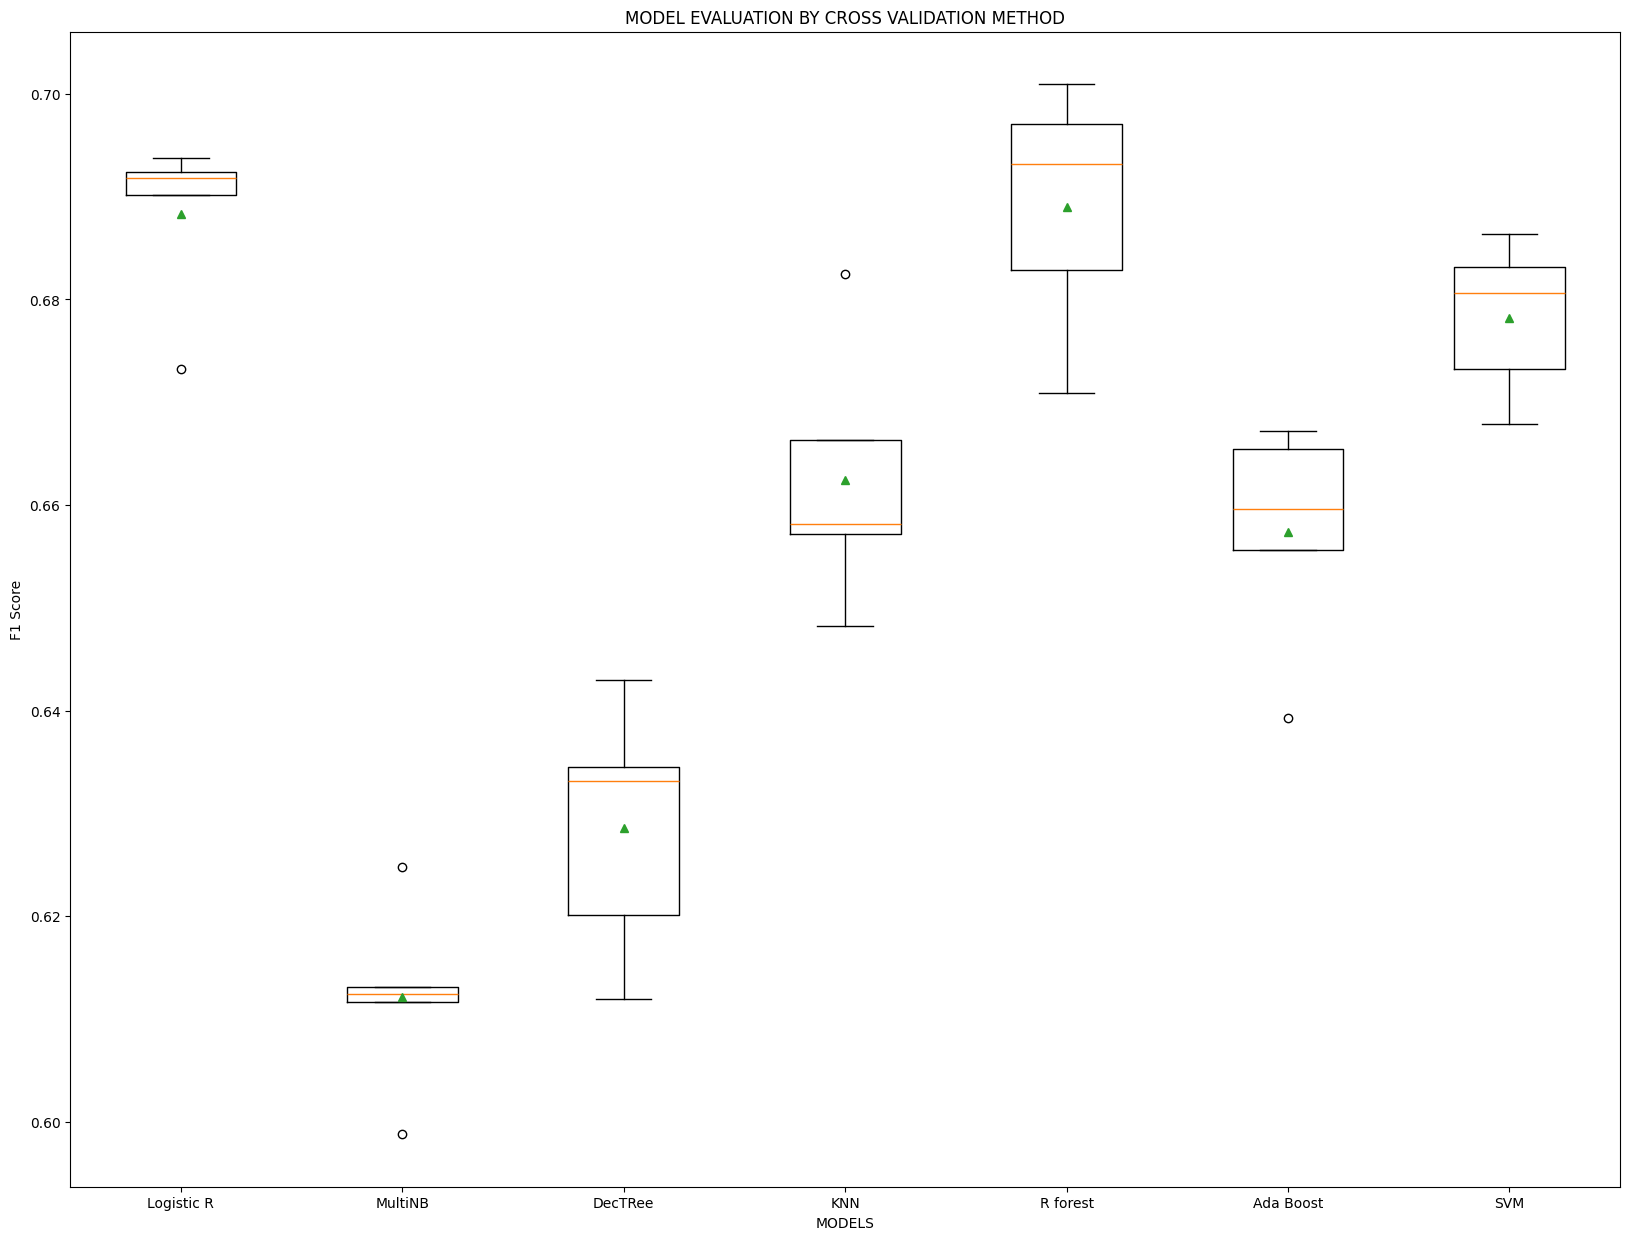

In [61]:
# Using cross validation method to avoid overfitting
import statistics as st
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

vector = TfidfVectorizer()

x_train_v = vector.fit_transform(x_train)
x_test_v = vector.transform(x_test)

# Model building
lr = LogisticRegression()
mnb = MultinomialNB()
dct = DecisionTreeClassifier(random_state=1)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=1)
ab = AdaBoostClassifier(random_state=1)
svm = SVC(random_state=1)  # Add SVM model
m = [lr, mnb, dct, knn, rf, ab, svm]  # Add SVM model to the list
model_name = ['Logistic R', 'MultiNB', 'DecTRee', 'KNN', 'R forest', 'Ada Boost', 'SVM']  # Add SVM to model names

results, mean_results, p, f1_test = list(), list(), list(), list()

# Model fitting, cross-validating and evaluating performance
def algor(model):
    print('\n', i)
    pipe = Pipeline([('model', model)])
    pipe.fit(x_train_v, y_train)
    cv = StratifiedKFold(n_splits=5)
    n_scores = cross_val_score(pipe, x_train_v, y_train, scoring='f1_weighted',
                               cv=cv, n_jobs=-1, error_score='raise')
    results.append(n_scores)
    mean_results.append(st.mean(n_scores))
    print('f1-Score(train): mean= (%.3f), min=(%.3f)) ,max= (%.3f),stdev= (%.3f)' % (
        st.mean(n_scores), min(n_scores), max(n_scores), np.std(n_scores)))
    y_pred = cross_val_predict(model, x_train_v, y_train, cv=cv)
    p.append(y_pred)
    f1 = f1_score(y_train, y_pred, average='weighted')
    f1_test.append(f1)
    print('f1-Score(test): %.4f' % (f1))

for i in m:
    algor(i)

# Model comparison By Visualizing
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_title('MODEL EVALUATION BY CROSS VALIDATION METHOD')
ax.set_xlabel('MODELS')
ax.set_ylabel('F1 Score')
ax.boxplot(results, labels=model_name, showmeans=True)
plt.show()


In [ ]:
x=merged_data['clean_text']
y=merged_data['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

vector = TfidfVectorizer()
x_train = vector.fit_transform(x_train)
x_test = vector.transform(x_test)
model_lr_tf=LogisticRegression()

model_lr_tf.fit(x_train,y_train)
y_pred=model_lr_tf.predict(x_test)
# Model Evaluation
    
conf=confusion_matrix(y_test,y_pred)
acc_lr=accuracy_score(y_test,y_pred)
f1_lr=f1_score(y_test,y_pred,average='weighted')

print('Accuracy: ',acc_lr)
print('F1 Score: ',f1_lr)
print(10*'===========')
print('Confusion Matrix: \n',conf)
print(10*'===========')
print('Classification Report: \n',classification_report(y_test,y_pred))

Accuracy:  0.7341549295774648
F1 Score:  0.7347496724438446
Confusion Matrix: 
 [[181  69]
 [ 82 236]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.72      0.71       250
           1       0.77      0.74      0.76       318

    accuracy                           0.73       568
   macro avg       0.73      0.73      0.73       568
weighted avg       0.74      0.73      0.73       568

